# Projeto 1 - Ciência dos Dados

Nome:Luka Siqueira Ferreira de Figueiredo

Nome:João Pedro de Souza Costa Ferreira

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

# Obtenção de tweets

## Preparando o ambiente no jupyter:

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [151]:
filename = 'guarana.xlsx'
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lukad\Insper\Cdados\P1


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [152]:
train = pd.read_excel(filename)
train

,Treinamento,Relevancia
0,guaraná antarctica é o melhor o mundo,1
1,sábadou bebendo naná que meu parsa @zedelivery...,0
2,"@ph_koreah sim mano, é muito estranho, parece ...",1
3,@guarana sempre pensando em uma piada e fazend...,0
4,@ihatelipu só tem uma coisa que é melhor q gua...,0
...,...,...
295,@anygdowney guaraná surra mto avisa,0
296,estão tomando guaraná e coca e eu no chá de pê...,0
297,@guarana eu pra qualquer coisa e pessoa: https...,0
298,"@victoriadr3w agitaaaa, levo guaraná p gnt",1


In [153]:
# Função que faz a Limpeza de Strings
import re 
def cleanup(text):
    punctuation = '[!-.:?;()]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [154]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [155]:
import functools
import operator
import emoji

# função para separar emojis 
def sem_emoji(em):
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    
    return em_split

In [156]:
# Transforma Series Treinamento para lista
Ltrain = train.Treinamento.tolist()

In [157]:
Lcorrigido = []

for tweet in Ltrain:
    tweet_clean = cleanup(tweet) # remove caracteres como !-.:?;()
    Lpalavras = sem_emoji(tweet_clean) # retorna uma lista com split com emojis já separados 
    i=0
    # LIMPEZA:
    
    # Remove @meções e links (hhtp...)
    while i<len(Lpalavras):
        if Lpalavras[i][0] == '@' or Lpalavras[i][0:4] == 'http':
            
     
            if i == len(Lpalavras): 
                Lpalavras = Lpalavras[:, i] 
            if i == 0:
                Lpalavras = Lpalavras[1:] 
            else:    
                inicio = Lpalavras[:i]  
                fim = Lpalavras[i+1:] 
                Lpalavras = inicio + fim
                
     
        elif Lpalavras[-1][-1] == '…':
            Lpalavras = Lpalavras[:-1]
            
        # Remove 'rt':
        elif len(Lpalavras[0]) == 2 and Lpalavras[0][:2] == 'rt':
            Lpalavras = Lpalavras[1:]

        else:
            i+=1
  
    string = ''
    for palavra in Lpalavras:
        string += palavra
        string += ' '
        
    string
    
    Lcorrigido.append(string[:-1]) 
    
Lcorrigido

['guaraná antarctica é o melhor o mundo',
 'sábadou bebendo naná que meu parsa fortaleceu com o cupom naotemcomoerrar e me bateu a curiosidade digita ai “burgão e naná é e deixa seu corretor completar valendo nãotemcomoerrar',
 'sim mano é muito estranho parece o refri sem gás mas ao mesmo tempo é melhor q guaraná sem gás',
 'sempre pensando em uma piada e fazendo palhaçada pra tentar esquecer de algo muito pior',
 'só tem uma coisa que é melhor q guaraná',
 'esse vídeo vale mais que mil imagens',
 'e se eu misturar energético vodka e guaraná em pó',
 'guaraná jesus é horrível q nojo',
 'pra mim vc é coquinha olha do guaraná eu só não sou famoso',
 '15 dias sem tomar refri que tentação olhar pra esse guaraná antarctica aqui',
 'vou parar lá na frente e vender salgado a 6 reais com um copo de suco ou guaraná 😋 😂',
 'coca cola as vezes dá uma saturadamas guaraná é tudo de bom geladinho uma coca geladinho tbm é tudo',
 'essa é a última da galeria ademir kkkkk',
 'serio o de guaraná é bom 

In [158]:

# Transformando a lista de tweets corrigidos em Dataframe
dados = pd.DataFrame(Lcorrigido, columns=['Treinamento'])
dados['Relevancia'] = train.Relevancia.copy()
dados

,Treinamento,Relevancia
0,guaraná antarctica é o melhor o mundo,1
1,sábadou bebendo naná que meu parsa fortaleceu ...,0
2,sim mano é muito estranho parece o refri sem g...,1
3,sempre pensando em uma piada e fazendo palhaça...,0
4,só tem uma coisa que é melhor q guaraná,0
...,...,...
295,guaraná surra mto avisa,0
296,estão tomando guaraná e coca e eu no chá de pê...,0
297,eu pra qualquer coisa e pessoa,0
298,agitaaaa levo guaraná p gnt,1


## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

O nosso produto é um refrigerante da fruta guarana
Classificamos como relevante todo tipo de sugestao para a marca (gostos, tamanhos de garrafas,...)

### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [159]:

# Separando dados Relevantes dos Irrelevantes:
TTrelevantes = dados.loc[dados.Relevancia == 1, :]
TTirrelevantes = dados.loc[dados.Relevancia == 0, :]

TTrelevantes.head()

,Treinamento,Relevancia
0,guaraná antarctica é o melhor o mundo,1
2,sim mano é muito estranho parece o refri sem g...,1
6,e se eu misturar energético vodka e guaraná em pó,1
7,guaraná jesus é horrível q nojo,1
11,coca cola as vezes dá uma saturadamas guaraná ...,1


In [160]:
#Relevantes

# Separando as palavras:
Lrelevantes = TTrelevantes.Treinamento.tolist()
palavras_relevantes = []
for tweet in Lrelevantes:
    palavras = tweet.split()
    palavras_relevantes += palavras
    
len(palavras_relevantes)

# Criando um dicionario com a contagem de palavras:
dic_relevantes = {}
for palavra in palavras_relevantes:
    if palavra in dic_relevantes:
        dic_relevantes[palavra] +=1
    else:
        dic_relevantes[palavra] = 1
dic_relevantes

# Transformando em um DataFrame
relevantes = pd.DataFrame.from_dict(dic_relevantes, orient='index', columns=['Quantd'])
relevantes

,Quantd
guaraná,98
antarctica,2
é,32
o,26
melhor,8
...,...
agitaaaa,1
levo,1
gnt,1
daria,1


In [161]:
# Fazendo o mesmo para Irrelevantes :
# Separando as palavras:
Lirrelevantes = TTirrelevantes.Treinamento.tolist()
palavras_irrelevantes = []
for tweet in Lirrelevantes:
    palavras = tweet.split()
    palavras_irrelevantes += palavras
    
len(palavras_irrelevantes)

# Criando um dicionario com a contagem de palavras:
dic_irrelevantes = {}
for palavra in palavras_irrelevantes:
    if palavra in dic_irrelevantes:
        dic_irrelevantes[palavra] +=1
    else:
        dic_irrelevantes[palavra] = 1
dic_irrelevantes

# Transformando em um DataFrame
irrelevantes = pd.DataFrame.from_dict(dic_irrelevantes, orient='index', columns=['Quantd'])
irrelevantes

,Quantd
sábadou,1
bebendo,2
naná,6
que,31
meu,11
...,...
surra,1
avisa,1
tomando,1
pêssego,1


In [162]:
palavras = relevantes + irrelevantes

In [163]:
total_relevantes = len(relevantes.index)
total_irrelevantes = len(irrelevantes.index)
total_palavras = len(palavras.index)

print (f' Numero de palavras relevantes: {total_relevantes}')
print (f' Numero de palavras irrelevantes: {total_irrelevantes}')
print (f' Total de palavras: {total_palavras}')


 Numero de palavras relevantes: 685
 Numero de palavras irrelevantes: 929
 Total de palavras: 1357


In [164]:
relevantes['Probabilidade (smooth)'] = (relevantes.Quantd+1)/(total_relevantes + total_palavras)
relevantes

,Quantd,Probabilidade (smooth)
guaraná,98,0.048482
antarctica,2,0.001469
é,32,0.016161
o,26,0.013222
melhor,8,0.004407
...,...,...
agitaaaa,1,0.000979
levo,1,0.000979
gnt,1,0.000979
daria,1,0.000979


In [165]:
irrelevantes['Probabilidade (smooth)'] = (irrelevantes.Quantd+1)/(total_irrelevantes + total_palavras)
irrelevantes

,Quantd,Probabilidade (smooth)
sábadou,1,0.000875
bebendo,2,0.001312
naná,6,0.003062
que,31,0.013998
meu,11,0.005249
...,...,...
surra,1,0.000875
avisa,1,0.000875
tomando,1,0.000875
pêssego,1,0.000875


In [166]:
#pegando o arquivo de teste
base_teste = pd.read_excel(filename, sheet_name="Teste")
base_teste

,Teste,Relevancia
0,"na minha festa do líder ia ter feijoada, bolin...",0
1,só queria beber um guaraná antarctica,0
2,@guarana varia dependendo do dia https://t.co/...,0
3,"@guarana tá sendo meio paia, tô meio bad",1
4,@mec_melo eu só queria o teu guaraná famoso da...,0
...,...,...
154,@rosenrot_5 tem horas que nada supera um guara...,1
155,"@artlavri nossa, eu já fui viciada em kuat e d...",1
156,"@biribinha_love vc é o guarana jesus, pitiquin...",0
157,"@gabiv227 amg ,até pepsi é melhor q guaraná",1


In [167]:
# Transforma Series teste para lista
Ltweets_teste = base_teste.Teste.tolist()

In [168]:
Lcorrigido = []

for tweet in Ltweets_teste: 
    tweet_clean = cleanup(tweet) # remove caracteres como !-.:?;()
    Lpalavras = sem_emoji(tweet_clean) # retorna uma lista com split com emojis já separados 
    i=0
    # LIMPEZA:
    
    # Remove @meções e links (hhtp...)
    while i<len(Lpalavras):
        if Lpalavras[i][0] == '@' or Lpalavras[i][0:4] == 'http':
            
            if i == len(Lpalavras): 
                Lpalavras = Lpalavras[:, i]

            if i == 0:
                Lpalavras = Lpalavras[1:] 
            else:    
                inicio = Lpalavras[:i] 
                fim = Lpalavras[i+1:]

                Lpalavras = inicio + fim
                
        elif Lpalavras[-1][-1] == '…':
            Lpalavras = Lpalavras[:-1]
            
        # Remove 'rt':
        elif len(Lpalavras[0]) == 2 and Lpalavras[0][:2] == 'rt':
            Lpalavras = Lpalavras[1:]

        else:
            i+=1
    

    string = ''
    for palavra in Lpalavras:
        string += palavra
        string += ' '
        
    string
    
    Lcorrigido.append(string[:-1])
    
Lcorrigido

['na minha festa do líder ia ter feijoada bolinha de queijo brusqueta de abobrinha com queijo brie vinho branco rosé aperol e guaraná antártica sobremesa seria beijinho sem cravo e enrolado no coco ralado brigadeiro brigadeiro de pistache e café expresso',
 'só queria beber um guaraná antarctica',
 'varia dependendo do dia',
 'tá sendo meio paia tô meio bad',
 'eu só queria o teu guaraná famoso da tv mas a versão batizada kkkkkkkk',
 'eu sou o de boné',
 'eu nem vou tomar esse guaraná vou servir pros erês ja o chocolate sim ainda mais se for laka',
 'deu um problema la com eles e me mandaram um chocolate e um guaraná old que darei 5 estrelas',
 'café não é nada mais do que uma água suja mto deliciosa change my mind',
 'meus amigo pelo amor de deus',
 'chá é uma delícia sopa é uma merda vamo separar as coisas adm',
 '|￣￣￣￣￣￣￣￣￣￣￣￣| |guagua é um tipo de sopa | |＿＿＿＿＿＿＿＿＿＿＿＿| ∧＿∧ || ´ω` || / づ',
 'chá energético então 🤔',
 'qualquer refrigerante é horrível só guarana que é tomável',
 'leb

In [169]:
# Transformando a lista de tweets corrigidos em Dataframe
teste = pd.DataFrame(Lcorrigido, columns=['Teste'])
teste['Relevancia'] = base_teste.Relevancia.copy()
teste

,Teste,Relevancia
0,na minha festa do líder ia ter feijoada bolinh...,0
1,só queria beber um guaraná antarctica,0
2,varia dependendo do dia,0
3,tá sendo meio paia tô meio bad,1
4,eu só queria o teu guaraná famoso da tv mas a ...,0
...,...,...
154,tem horas que nada supera um guaraná delícia t...,1
155,nossa eu já fui viciada em kuat e depois em fa...,1
156,vc é o guarana jesus pitiquinho de mais,0
157,amg até pepsi é melhor q guaraná,1


In [170]:
# Cálculo de P(rel) e P(irrel)
p_re = total_relevantes / total_palavras
p_irre = total_irrelevantes / total_palavras


In [171]:
def classificador(tweet):
    Lpalavras = tweet.split()
    classificacao = ''
    p_tweet_re = 1
    p_tweet_irre = 1
    
    for palavra in Lpalavras:
        
        if palavra not in relevantes.index:
            p_tweet_re *= (0+1)/(total_relevantes + total_palavras)
        
        else: 
            p_tweet_re *= relevantes['Probabilidade (smooth)'][palavra]
            
        if palavra not in irrelevantes.index:
            p_tweet_irre *= (0+1)/(total_irrelevantes + total_palavras)
                
        else: 
            p_tweet_irre *= irrelevantes['Probabilidade (smooth)'][palavra]
            
    p_re_tweet = p_tweet_re * p_re
    p_irre_tweet = p_tweet_irre * p_irre
    
    if p_re_tweet > p_irre_tweet:
        classificacao = 'relevante'
        
    if p_re_tweet < p_irre_tweet:
        classificacao = 'irrelevante'
        

    return classificacao, p_re_tweet, p_irre_tweet

In [172]:
teste['Classificacao'] = '_'
Lclassificacoes = []
for i in range(len(teste.index)):
    tweet = teste.iloc[i, 0]
    resultado = classificador(tweet)[0]
    
    # cria lista com os resultados das probabilidades
    Lclassificacoes.append(classificador(tweet))
    
    teste.iloc[i, 2] = resultado
Lclassificacoes # lista contendo todos os valores de p(rel) e p(irrel) para os tweets.

[('relevante', 6.949402606074306e-111, 4.94475965038185e-114),
 ('relevante', 3.639530929509014e-14, 9.284109858241189e-16),
 ('irrelevante', 1.0451780335229494e-12, 1.0528833368219914e-12),
 ('irrelevante', 5.1146016998026174e-23, 1.7627128479515237e-22),
 ('irrelevante', 8.19150720138844e-37, 1.5460747154894574e-36),
 ('irrelevante', 2.9021348922992767e-12, 1.045698306177012e-11),
 ('relevante', 5.177714999724435e-52, 1.4111469020502058e-52),
 ('relevante', 3.1266502343880837e-49, 8.051391358717179e-50),
 ('irrelevante', 9.364696578851941e-43, 8.16855984809508e-42),
 ('relevante', 2.3394597343033154e-17, 1.8996504546252433e-18),
 ('irrelevante', 2.8107881603447354e-37, 7.410976975683313e-35),
 ('irrelevante', 5.002508856224328e-45, 8.529125185139903e-40),
 ('irrelevante', 1.1613089261366105e-13, 3.5096111227399717e-13),
 ('irrelevante', 1.504955534547237e-23, 3.597972515220568e-23),
 ('irrelevante', 9.470736760348121e-48, 1.2187444071228623e-46),
 ('relevante', 3.308664481371832e-16,

### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [173]:
# Análise relativa do acerto
Arelativa_acertos = pd.crosstab(teste.Relevancia, teste.Classificacao, normalize='columns').round(6)*100
Arelativa_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,83.908,55.5556
1,16.092,44.4444


In [174]:
# Distribuição dos acertos:
distribuicao_acertos = pd.crosstab(teste.Relevancia, teste.Classificacao, normalize='all').round(6)*100
distribuicao_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,45.9119,25.1572
1,8.8050,20.1258


### Concluindo

In [175]:
teste['Relevancia'].value_counts()

0    113
1     46
Name: Relevancia, dtype: int64

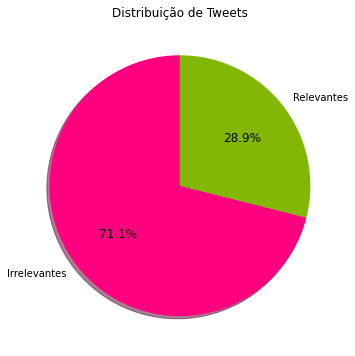

In [176]:
fig, asd = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))


relevancia0 = ['Irrelevantes', 'Relevantes']
data0 = [113, 46]
c0 = ['#ff007f', '#82B805']
wedges, texts, autotexts = asd.pie(data0,  labels=relevancia0, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c0)

ax0.legend(wedges, relevancia0,
          title="Classificação",
          loc="center left",
          bbox_to_anchor=(1, 1, 1, 1))

plt.setp(autotexts, size=12)

asd.set_title("Distribuição de Tweets")


plt.show()

In [177]:
distribuicao_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,45.9119,25.1572
1,8.8050,20.1258


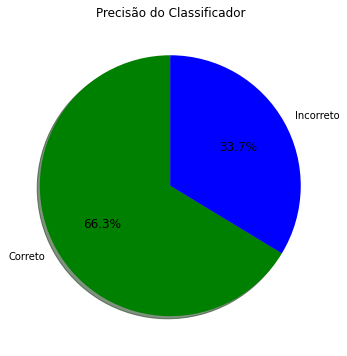

In [178]:
fig, asd = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

relevancia = ['Correto', 'Incorreto']

data = [65, 33]

def func(pct, allvals):
    return "{:.1f}%".format(allvals)

c1 = ['#008000', "#0000FF"]

wedges, texts, autotexts = asd.pie(data,  labels=relevancia, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c1)

ax1.legend(wedges, relevancia,
          title="Classificação",
          loc="center left",
          bbox_to_anchor=(1, 1, 1, 1))

plt.setp(autotexts, size=12)

asd.set_title("Precisão do Classificador")

plt.show()

In [179]:
Arelativa_acertos

Classificacao,irrelevante,relevante
Relevancia,,
0,83.908,55.5556
1,16.092,44.4444


Podemos concluir que o nosso Classificador tem uma acurácia de mais ou menos 50% e por isso ainda pode ser melhorado

### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)

## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://www.w3schools.com/python/ref_string_join.asp

https://stackoverflow.com/questions/49921720/how-to-split-emoji-from-each-other-python